In [2]:
import pandas as pd
import numpy as np
import requests
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

**1.Загрузите файл HR.csv в pandas dataframe**

In [3]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**2.Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).**

In [44]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [49]:
#Значение моды
for i in range(5):
    print('Значение моды :', df.iloc[:, [i,]].mode())
    i +=i

Значение моды :    satisfaction_level
0                 0.1
Значение моды :    last_evaluation
0             0.55
Значение моды :    number_project
0               4
Значение моды :    average_montly_hours
0                   135
1                   156
Значение моды :    time_spend_company
0                   3


**3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.**

In [116]:
display(df.corr())
display(df.corr(method = 'spearman'))
# Наиболее скоррелированные переменные это:
#1.среднее количество часов на рабочем месте и количеством проектов, 
#выполненных за время работы.(связь прямая 0,417211)
#2.уровень удовлетворенности работой и факт увольнения сотрудника.(связь обратная -0,388375)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


<AxesSubplot:xlabel='average_montly_hours', ylabel='number_project'>

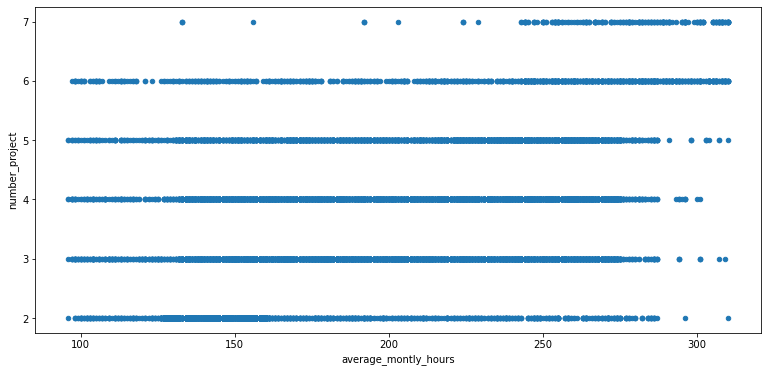

In [100]:
#Имеется сильная взаимосвязь между средним количеством часов на рабочем месте и количеством проектов, 
#выполненных за время работы.
df.plot(kind='scatter', x='average_montly_hours', y='number_project') # связь видна на scatter plot

<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

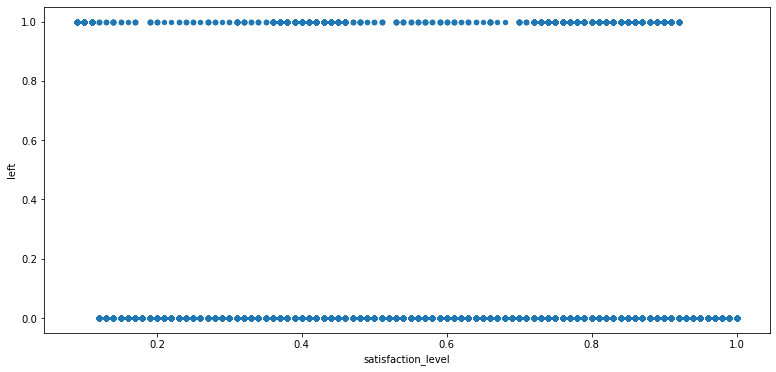

In [101]:
#Имеется сильная взаимосвязь между уровнем удовлетворенности работой и фактом увольнения сотрудника. 
# что тоже вполне обьяснимо.
df.plot(kind='scatter', x='satisfaction_level', y='left')

In [169]:
# Наименее скоррелированные переменные это:
#1.стаж работы сотрудника в компании и наличие несчастных случаев произошедщих с сотрудником на рабочем месте. 

#2.количество проектов, ывполненных за время работы и  факта повышения сотрудника.
#(что странно, по идее хорошие сотрудники, создающие много проектов считаються перспективными, 
#а это предпологает карьерный рост).

<AxesSubplot:xlabel='time_spend_company', ylabel='Work_accident'>

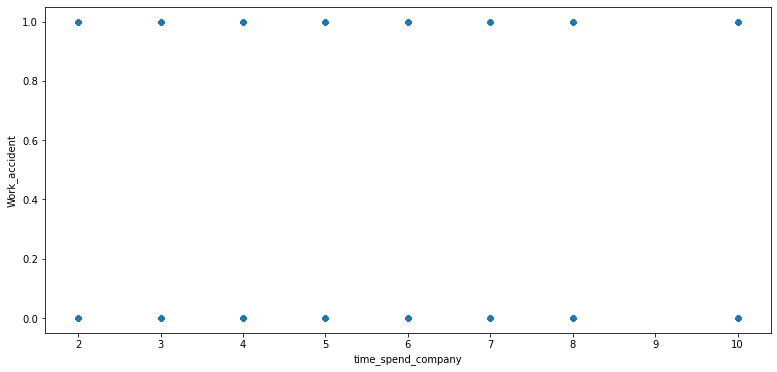

In [105]:
df.plot(kind='scatter', x='time_spend_company', y='Work_accident')

<AxesSubplot:xlabel='promotion_last_5years', ylabel='number_project'>

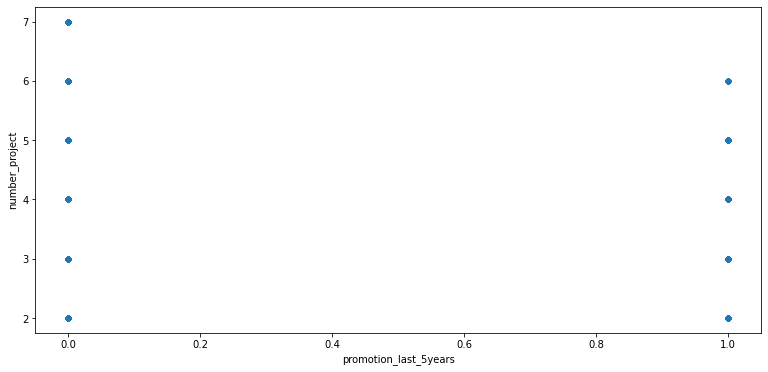

In [108]:
df.plot(kind='scatter', x='promotion_last_5years', y='number_project')

**4.Рассчитайте сколько сотрудников работает в каждом департаменте.**

In [69]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [74]:
#Если считать что 1 оценка уровня удовлетворенности проставлена 1 сотрудником, то количество сотрудников в отделах - 
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

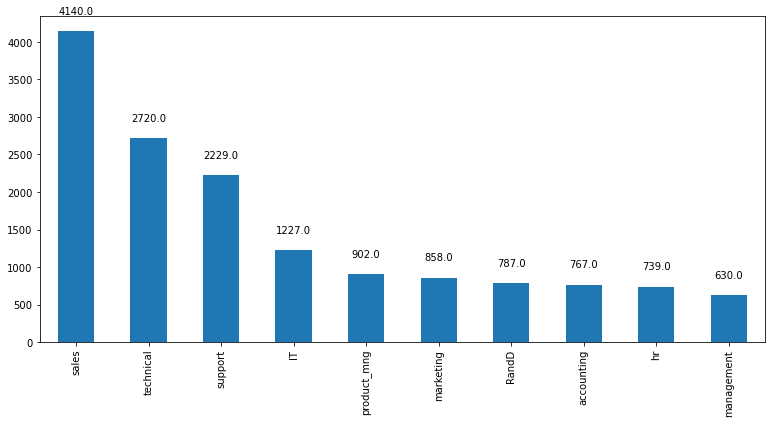

In [115]:
#Визуализация колличества сотрудников по отделам
top_department = df['department'].value_counts()
ax = top_department.plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 20), 
                textcoords = 'offset points')

**5.Показать распределение сотрудников по зарплатам.**

In [78]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

**7316 сотрудников получают низкую оплату труда, 6446 получают среднюю по уровню оплату труда,  и 1237 - высокую.**

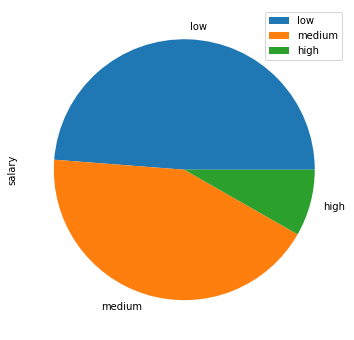

In [84]:
# распределение зарплат визуально
top_salary = df['salary'].value_counts().sort_values(ascending = False).head()
ax = top_salary.plot(kind='pie')
ax.legend()

**6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

In [152]:
#Название департаментов
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [43]:
#распределение сотрудников в департаментах по уровню зарплат
sales_ = df.groupby('department')['salary'].value_counts()
sales_

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

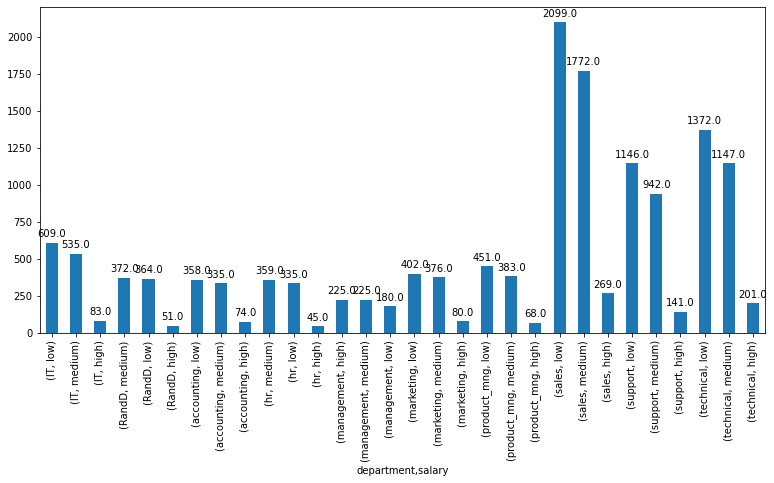

In [44]:
#визуализация распределения зарплат в дераптаментах. 
#Самая большая доля сотрудников с высокой зарплатой в отделе sales, technical, management.
ax = sales_.plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

**7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

In [87]:
#H0 - сотрудники с высоким окладом проводят на работе больше времени
#H1 - сотрудники с низким окладом проводят на работе больше времени

In [130]:
#Применяем критерий t-Стьюдент
import scipy.stats as stats
high_salary = df[df['salary'].str.contains('high', case = False, na=False)]
#high_salary
low_salary = df[df['salary'].str.contains('low', case = False, na=False)]
#low_salary
s, p = stats.ttest_ind(high_salary['average_montly_hours'], low_salary['average_montly_hours'])
print(s, p)

-0.7288680398062308 0.4661023478267259


In [133]:
# Уровень значимости 0.5
alpha = 0.05
if p > alpha:
    print('Сотрудники с высоким окладом проводят на работе больше времени(не отвергаем H0)')
else:
    print('Сотрудники с низким окладом проводят на работе больше времени(отклоняем H0)')

Сотрудники с высоким окладом проводят на работе больше времени(не отвергаем H0)


**Верна гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.**

**8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**                  
 ●Доля сотрудников с повышением за последние 5 лет                         
 ●Средняя степень удовлетворенности                                  
 ●Среднее количество проектов

In [63]:
# Данные показателей среди не уволившися сотрудников
left_0 = df[df['left'] == 0]
#display(left_0)
raising =(left_0['promotion_last_5years'].sum()/len(left_0['promotion_last_5years']) * 100).round(2)
print(f'Доля сотрудников с повышением за последние 5 лет: {raising}% ')
satisfaction_level = (left_0['satisfaction_level'].median())
print(f'Среднняя степень удовлетворенности: {satisfaction_level} баллов ')
number_project = (left_0['number_project'].median())
print(f'Среднее количество проектов:{number_project}')

Доля сотрудников с повышением за последние 5 лет: 2.63% 
Среднняя степень удовлетворенности: 0.69 баллов 
Среднее количество проектов:4.0


In [51]:
# Данные показателей среди уволившися сотрудников
left_1 = df.loc[df['left'] == 1]
#display(left_1)
raising =(left_1['promotion_last_5years'].sum()/len(left_1['promotion_last_5years']) * 100).round(2)
print(f'Доля сотрудников с повышением за последние 5 лет: {raising}% ')
satisfaction_level = (left_1['satisfaction_level'].median())
print(f'Среднняя степень удовлетворенности: {satisfaction_level} баллов ')
number_project = (left_1['number_project'].median())
print(f'Среднее количество проектов:{number_project}')
#На основании полученных данных можно смело сказать, что уволившиеся сотрудники получали повышение в 2 раза реже 
#и имели низкую степень удовлетворенности работой. Количество проектов при этом в среднем одинаковое в обоих группах.

Доля сотрудников с повышением за последние 5 лет: 0.53% 
Среднняя степень удовлетворенности: 0.41 баллов 
Среднее количество проектов:4.0


**На основании полученных данных можно смело сказать, что уволившиеся сотрудники получали повышение в 2 раза реже 
и имели низкую степень удовлетворенности работой. Количество проектов при этом в среднем одинаковое в обоих группах.**

**9.Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)Оценить качество модели на тестовой выборки**

In [70]:
#удалим столбцы 'department', 'salary' для корректной оценки
df_1 = df.drop (columns = ['department', 'salary'])
df_1
# разделяем выборку на тренировочную и тестовую
data = df_1[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
target = df_1['left']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

In [71]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [72]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [73]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [74]:
# Оцениваем качетво модели. Смотрим разницу факта и прогноза, есть небольшая разница.
result = pd.DataFrame([y_test.values, y_pred]).T
result.columns = ['test', 'predict']
result

,test,predict
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
4495,1,0
4496,0,0
4497,0,0
4498,1,0


In [75]:
from sklearn.metrics import accuracy_score
# расчет точности
accuracy_score(y_test, lda.predict(X_test))
#точность прогнозных данных составляет 76,5%

0.7651111111111111

In [76]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.49479326e+00,  6.86886012e-01, -2.34936831e-01,
         3.82702253e-03,  2.37374301e-01, -1.07539908e+00,
        -1.07960965e+00]])

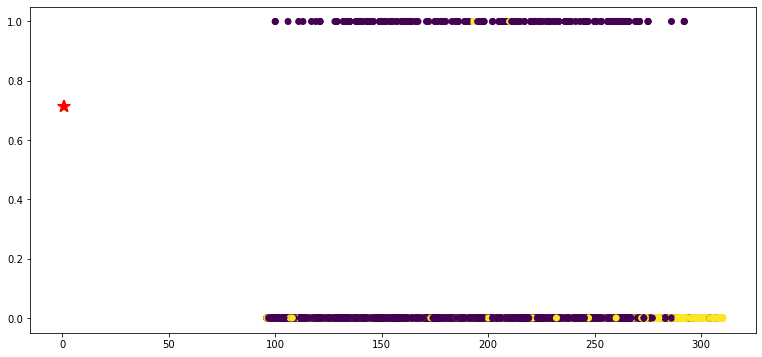

In [77]:
# визуализируем дискриминантную линию только по 2 признакам
# визуализируем центроиды
plt.scatter(X_train['average_montly_hours'], X_train['promotion_last_5years'], c=lda.predict(X_train))

plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

**10.Загрузить jupyter notebook с решение на github и прислать ссылку**

**Работа загружена**